In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.4,rc={'figure.figsize':(12,8)})

In [4]:
college_df = pd.read_csv('MERGED2015_16_PP.csv')

/home/tylergiallanza/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
interesting_columns = ['INSTNM','STABBR','HIGHDEG','CONTROL',
                       'REGION','CCBASIC','ADM_RATE','ACTCM25',
                      'ACTCM75','PCIP11','PCIP14','PCIP27',
                      'UGDS','UGDS_WHITENH','PCTPELL',
                      'C150_4','UGDS_MEN','UGDS_WOMEN','VETERAN',
                      'FIRST_GEN','FAMINC','MD_FAMINC',
                      'MD_EARN_WNE_P6','GRADS']

def map_highdeg(deg):
    deg = int(deg)
    deg_map = ['Non-degree-granting','Certificate degree',
               'Associate degree',"Bachelor's degree",
               'Graduate degree']
    return deg_map[deg]

def map_control(ctrl):
    ctrl = int(ctrl)
    ctrl_map = ['','Public','Private nonprofit','Private for-profit']
    return ctrl_map[ctrl]

def map_region(reg):
    reg = int(reg)
    reg_map = ['US Service Schools','New England','Mid East'
               ,'Great Lakes','Plains','Southeast','Southwest',
               'Rocky Mountains','Far West','Outlying Areas']
    return reg_map[reg]

def make_float(f):
    try:
        return float(f)
    except:
        return np.nan

processed_df = college_df[interesting_columns]
processed_df.HIGHDEG = processed_df.HIGHDEG.apply(map_highdeg)
processed_df.CONTROL = processed_df.CONTROL.apply(map_control)
processed_df.REGION = processed_df.REGION.apply(map_region)
processed_df.VETERAN = processed_df.VETERAN.apply(make_float)
processed_df.FAMINC = processed_df.FAMINC.apply(make_float)
processed_df.MD_FAMINC = processed_df.MD_FAMINC.apply(make_float)
processed_df.FIRST_GEN = processed_df.FIRST_GEN.apply(make_float)

print(processed_df.head())

/home/tylergiallanza/.local/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


                                INSTNM STABBR          HIGHDEG  \
0             Alabama A & M University     AL  Graduate degree   
1  University of Alabama at Birmingham     AL  Graduate degree   
2                   Amridge University     AL  Graduate degree   
3  University of Alabama in Huntsville     AL  Graduate degree   
4             Alabama State University     AL  Graduate degree   

             CONTROL     REGION  CCBASIC  ADM_RATE  ACTCM25  ACTCM75  PCIP11  \
0             Public  Southeast     18.0    0.6538     16.0     19.0  0.0634   
1             Public  Southeast     15.0    0.6043     22.0     28.0  0.0133   
2  Private nonprofit  Southeast     21.0       NaN      NaN      NaN  0.0000   
3             Public  Southeast     15.0    0.8120     24.0     30.0  0.0315   
4             Public  Southeast     18.0    0.4639     16.0     19.0  0.0567   

    ...    PCTPELL  C150_4  UGDS_MEN  UGDS_WOMEN   VETERAN  FIRST_GEN  \
0   ...     0.7249  0.3081    0.4617      0.5383 

In [6]:
print(processed_df.dtypes)
SAVE = True

INSTNM             object
STABBR             object
HIGHDEG            object
CONTROL            object
REGION             object
CCBASIC           float64
ADM_RATE          float64
ACTCM25           float64
ACTCM75           float64
PCIP11            float64
PCIP14            float64
PCIP27            float64
UGDS              float64
UGDS_WHITENH      float64
PCTPELL           float64
C150_4            float64
UGDS_MEN          float64
UGDS_WOMEN        float64
VETERAN           float64
FIRST_GEN         float64
FAMINC            float64
MD_FAMINC         float64
MD_EARN_WNE_P6    float64
GRADS             float64
dtype: object


## Box/Violin Plots

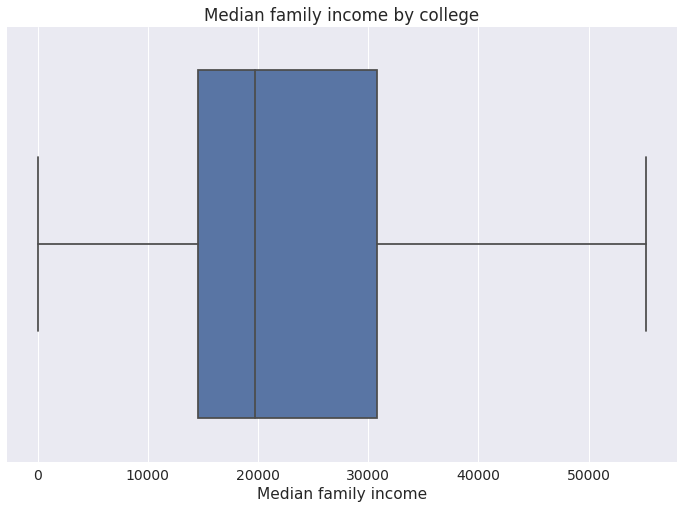

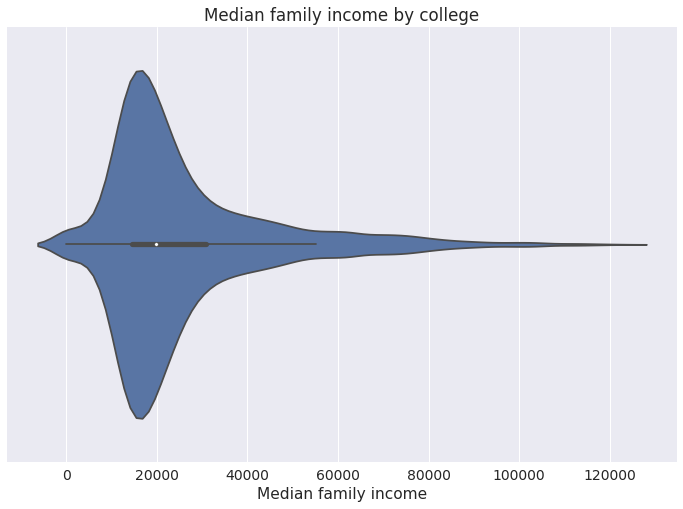

In [34]:
sns.boxplot(x=processed_df.MD_FAMINC,showfliers=False)
plt.title('Median family income by college')
plt.xlabel('Median family income')
if SAVE:
    plt.savefig('images/boxp.png')
    plt.show()
else:
    plt.show()

sns.violinplot(x=processed_df.MD_FAMINC,showfliers=False)
plt.title('Median family income by college')
plt.xlabel('Median family income')
if SAVE:
    plt.savefig('images/viop.png')
    plt.show()
else:
    plt.show()

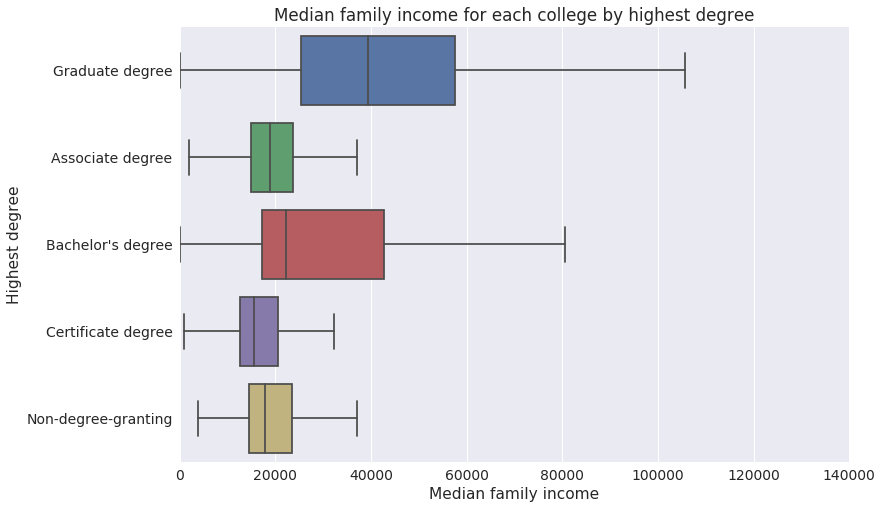

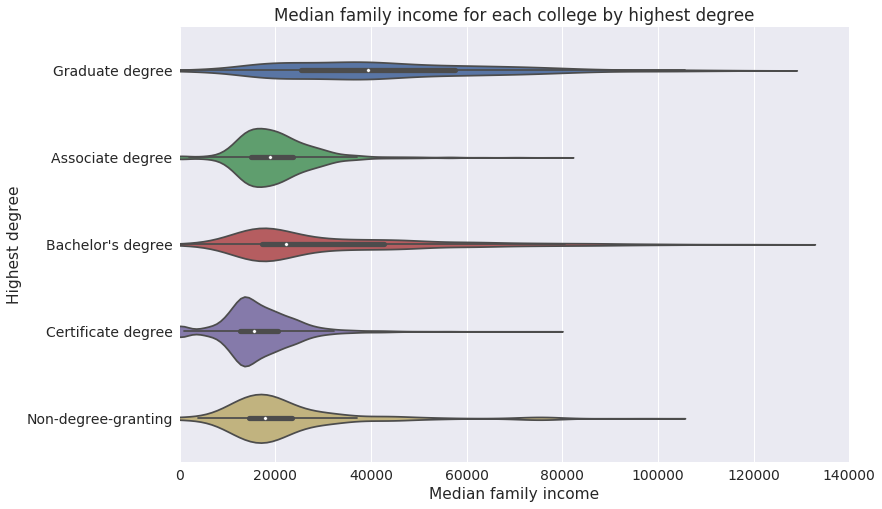

In [35]:
sns.boxplot(x=processed_df.MD_FAMINC,y=processed_df.HIGHDEG,
            showfliers=False)
plt.title('Median family income for each college by highest degree')
plt.ylabel('Highest degree')
plt.xlabel('Median family income')
plt.xlim(0,140000)
if SAVE:
    plt.savefig('images/mboxp.png')
    plt.show()
else:
    plt.show()

sns.violinplot(x=processed_df.MD_FAMINC,y=processed_df.HIGHDEG,
            showfliers=False)
plt.title('Median family income for each college by highest degree')
plt.ylabel('Highest degree')
plt.xlabel('Median family income')
plt.xlim(0,140000)
if SAVE:
    plt.savefig('images/mviop.png')
    plt.show()
else:
    plt.show()

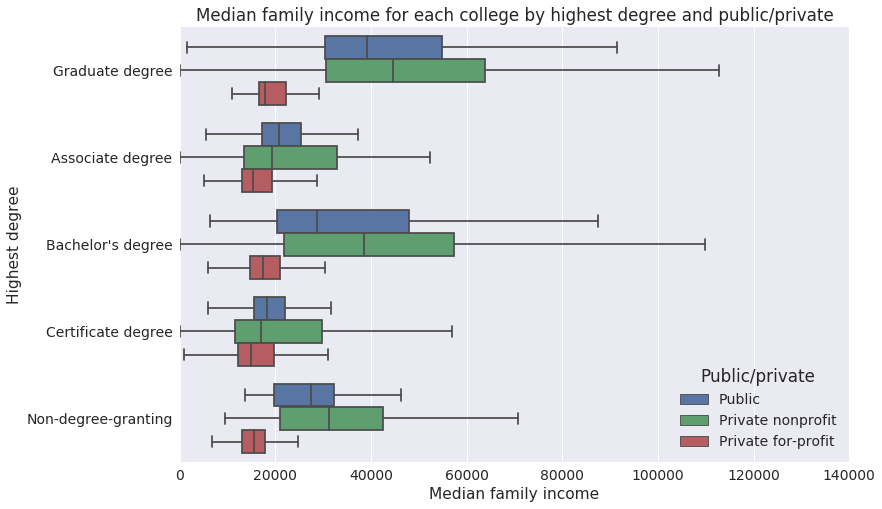

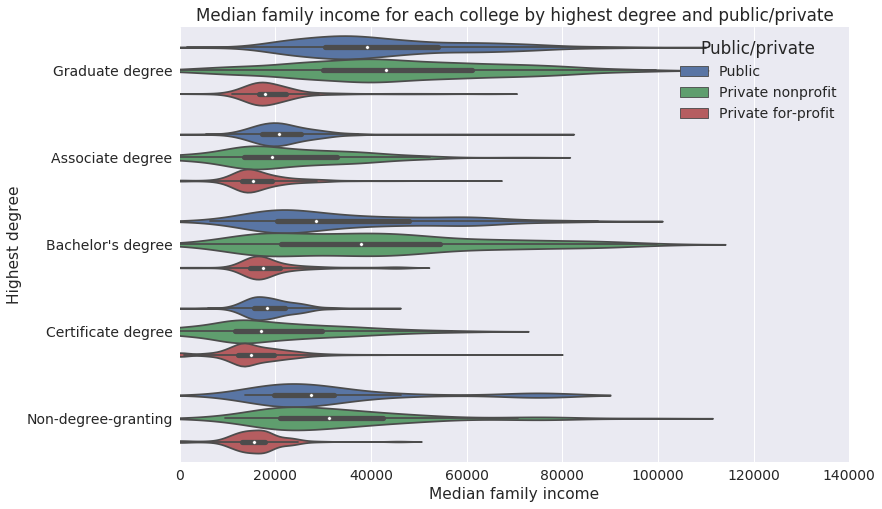

In [36]:
g = sns.boxplot(x=processed_df.MD_FAMINC,y=processed_df.HIGHDEG,
            hue=processed_df.CONTROL,showfliers=False)
plt.title('Median family income for each college by highest degree and public/private')
plt.ylabel('Highest degree')
plt.xlabel('Median family income')
plt.xlim(0,140000)
g.legend(title='Public/private')
if SAVE:
    plt.savefig('images/sboxp.png')
    plt.show()
else:
    plt.show()

filt = processed_df.MD_FAMINC < 100000
g = sns.violinplot(x=processed_df.MD_FAMINC[filt]
                   ,y=processed_df.HIGHDEG[filt],
            hue=processed_df.CONTROL[filt],showfliers=False,
                  scale='width')
plt.title('Median family income for each college by highest degree and public/private')
plt.ylabel('Highest degree')
plt.xlabel('Median family income')
plt.xlim(0,140000)
g.legend(title='Public/private')
if SAVE:
    plt.savefig('images/sviop.png')
    plt.show()
else:
    plt.show()

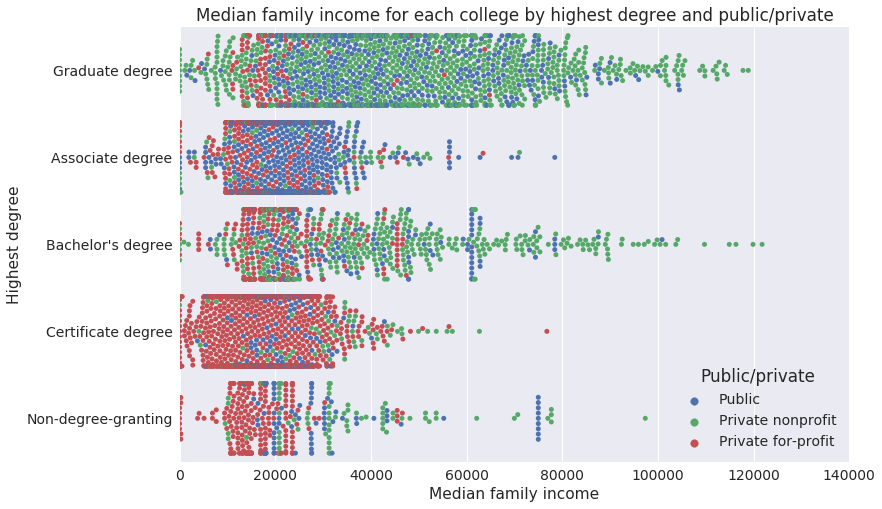

In [37]:
filt = processed_df.MD_FAMINC < 150000
g = sns.swarmplot(x=processed_df.MD_FAMINC[filt]
                   ,y=processed_df.HIGHDEG[filt],
            hue=processed_df.CONTROL[filt])
plt.title('Median family income for each college by highest degree and public/private')
plt.ylabel('Highest degree')
plt.xlabel('Median family income')
plt.xlim(0,140000)
g.legend(title='Public/private')
if SAVE:
    plt.savefig('images/swarmp.png')
    plt.show()
else:
    plt.show()

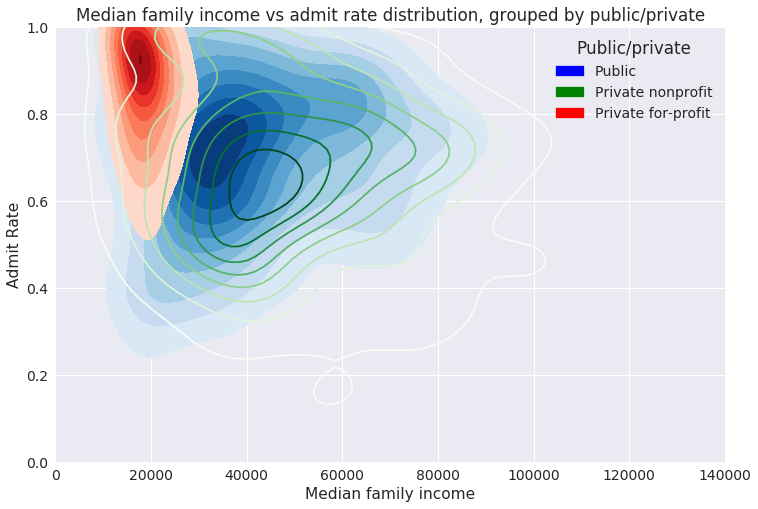

In [38]:
not_nan = processed_df[np.logical_and(
    np.logical_not(np.isnan(processed_df.MD_FAMINC)),
    np.logical_not(np.isnan(processed_df.ADM_RATE)))]
public = not_nan.loc[not_nan.CONTROL == 'Public']
nopi = not_nan.loc[not_nan.CONTROL == 'Private nonprofit']
forpi = not_nan.loc[not_nan.CONTROL == 'Private for-profit']


g = sns.kdeplot(public.MD_FAMINC,
               data2=public.ADM_RATE,
               cmap='Blues',
               shade=True,shade_lowest=False)
g = sns.kdeplot(nopi.MD_FAMINC,
               data2=nopi.ADM_RATE,
               cmap='Greens',
               shade=False,shade_lowest=False)
g = sns.kdeplot(forpi.MD_FAMINC,
               data2=forpi.ADM_RATE,
               cmap='Reds',
               shade=True,shade_lowest=False)
plt.title('Median family income vs admit rate distribution, grouped by public/private')
plt.ylabel('Admit Rate')
plt.xlabel('Median family income')
plt.ylim(0,1)
plt.xlim(0,140000)

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue',label='Public')
green_patch = mpatches.Patch(color='green',label='Private nonprofit')
red_patch = mpatches.Patch(color='red',label='Private for-profit')
g.legend(handles=[blue_patch,green_patch,red_patch],
         title='Public/private')
if SAVE:
    plt.savefig('images/kdep.png')
    plt.show()
else:
    plt.show()

## Bar/Column Charts

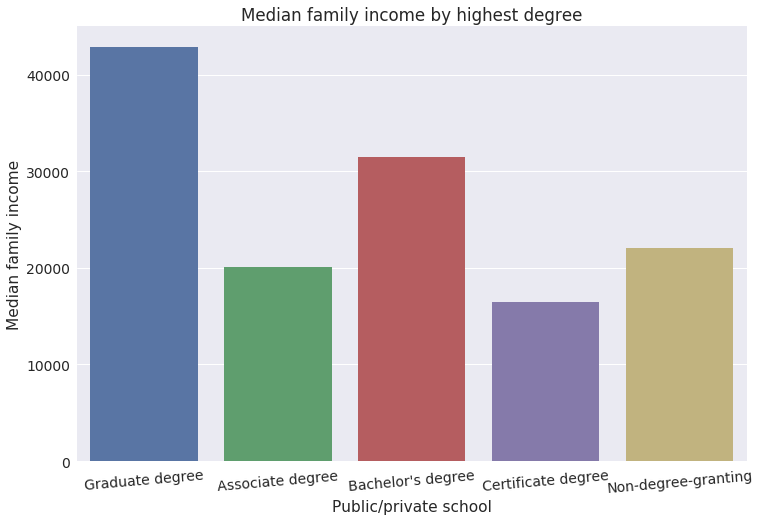

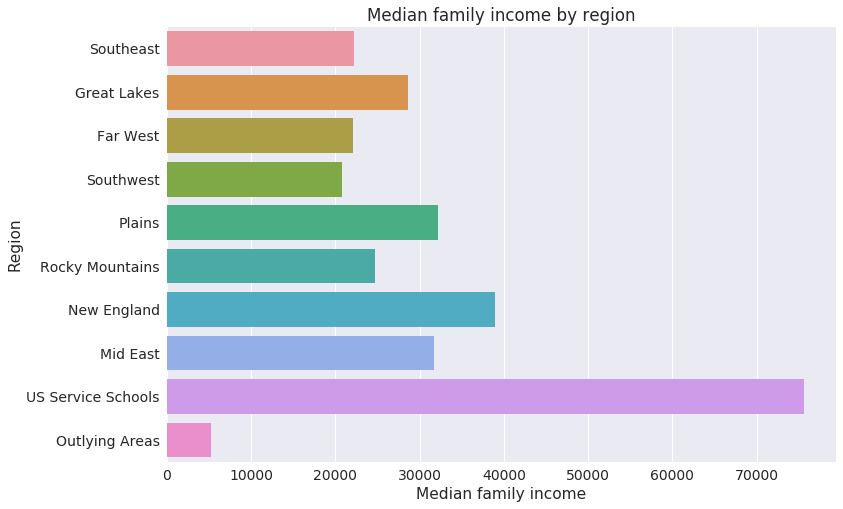

In [9]:
g = sns.barplot(x=processed_df.HIGHDEG,y=processed_df.MD_FAMINC,
           ci=None)

plt.title('Median family income by highest degree')
plt.ylabel('Median family income')
plt.xlabel('Public/private school')
for item in g.get_xticklabels():
    item.set_rotation(5)
if SAVE:
    plt.savefig('images/colp.png')
    plt.show()
else:
    plt.show()

sns.barplot(y=processed_df.REGION,x=processed_df.MD_FAMINC,
           ci=None)

plt.title('Median family income by region')
plt.ylabel('Region')
plt.xlabel('Median family income')
if SAVE:
    plt.savefig('images/barp.png')
    plt.show()
else:
    plt.show()

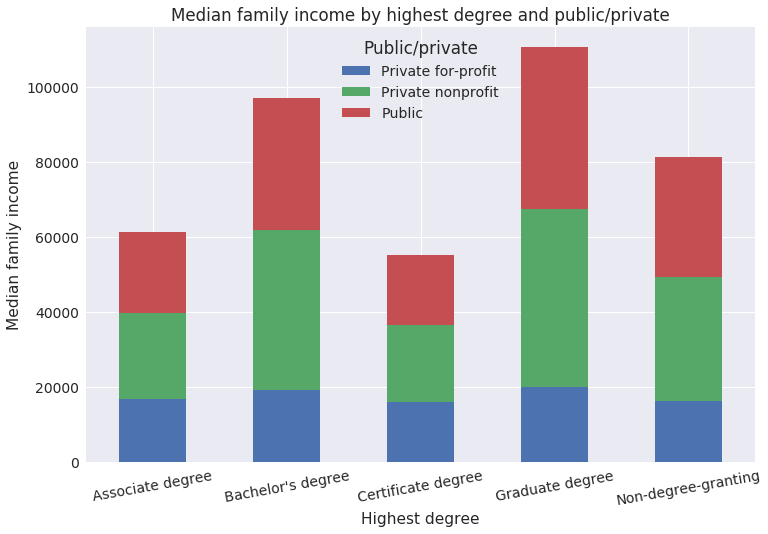

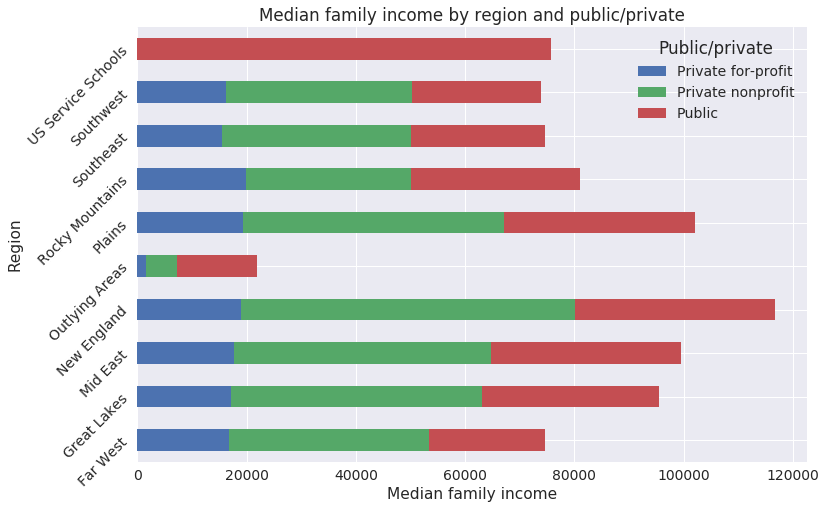

In [14]:
def make_stacked(df,x,y,c,col):
    pivot_df=pd.pivot_table(df,index=x,columns=c,values=y)
    if col:
        return pivot_df.plot.bar(stacked=True)
    else:
        return pivot_df.plot.barh(stacked=True)

g = make_stacked(processed_df,'HIGHDEG','MD_FAMINC',
            'CONTROL',True)
g.legend(title='Public/private')
plt.title('Median family income by highest degree and public/private')
plt.ylabel('Median family income')
plt.xlabel('Highest degree')
for item in g.get_xticklabels():
    item.set_rotation(10)
if SAVE:
    plt.savefig('images/scolp.png')
    plt.show()
else:
    plt.show()

g = make_stacked(processed_df,'REGION','MD_FAMINC',
            'CONTROL',False)
g.legend(title='Public/private')
plt.title('Median family income by region and public/private')
plt.ylabel('Region')
plt.xlabel('Median family income')
for item in g.get_yticklabels():
    item.set_rotation(45)
if SAVE:
    plt.savefig('images/sbarp.png')
    plt.show()
else:
    plt.show()

## Heatmaps

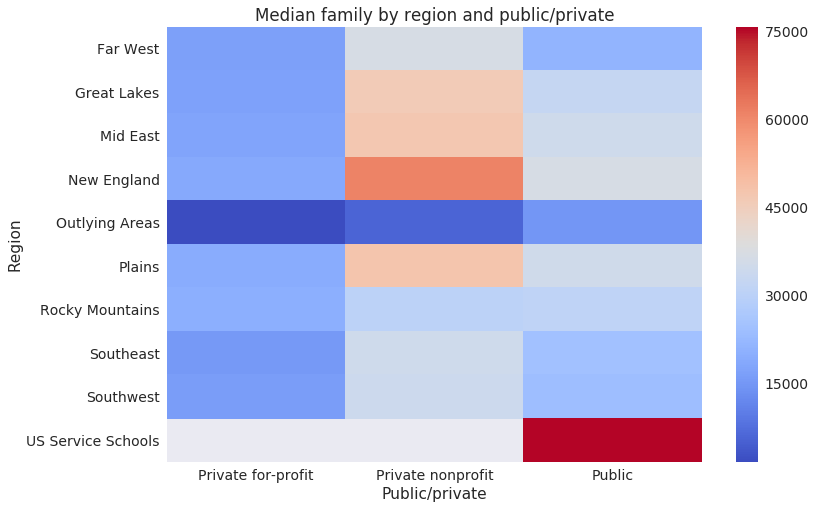

In [41]:
pivot_df=pd.pivot_table(processed_df,index='REGION',columns='CONTROL',
                        values='MD_FAMINC')
g = sns.heatmap(pivot_df,cmap='coolwarm')
plt.title('Median family by region and public/private')
plt.ylabel('Region')
plt.xlabel('Public/private')

if SAVE:
    plt.savefig('images/heatp.png')
    plt.show()
else:
    plt.show()

## Scatter plots and Bubble charts

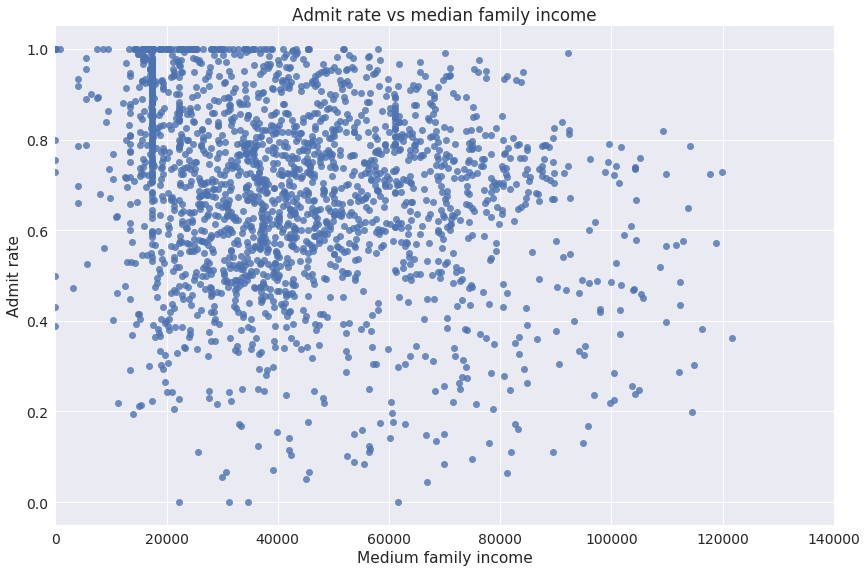

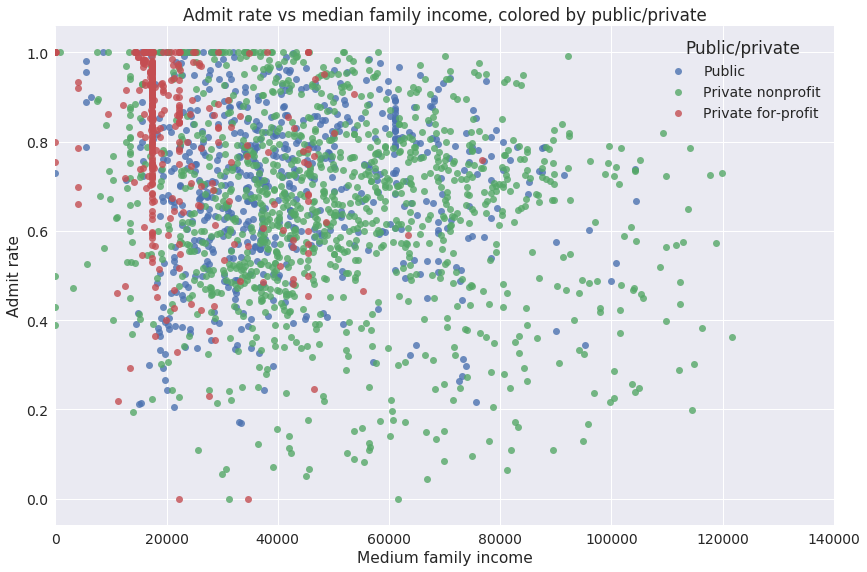

In [42]:
g = sns.lmplot('MD_FAMINC','ADM_RATE',data=processed_df,
              fit_reg=False,size=8,aspect=1.5)

plt.xlim(0,140000)
plt.title('Admit rate vs median family income')
plt.ylabel('Admit rate')
plt.xlabel('Medium family income')

if SAVE:
    plt.savefig('images/scatp.png')
    plt.show()
else:
    plt.show()

g = sns.lmplot('MD_FAMINC','ADM_RATE',hue='CONTROL',data=processed_df,
              fit_reg=False,size=8,aspect=1.5,legend=False)

plt.xlim(0,140000)
plt.title('Admit rate vs median family income, colored by public/private')
plt.ylabel('Admit rate')
plt.xlabel('Medium family income')
plt.legend(title='Public/private')

if SAVE:
    plt.savefig('images/cscatp.png')
    plt.show()
else:
    plt.show()

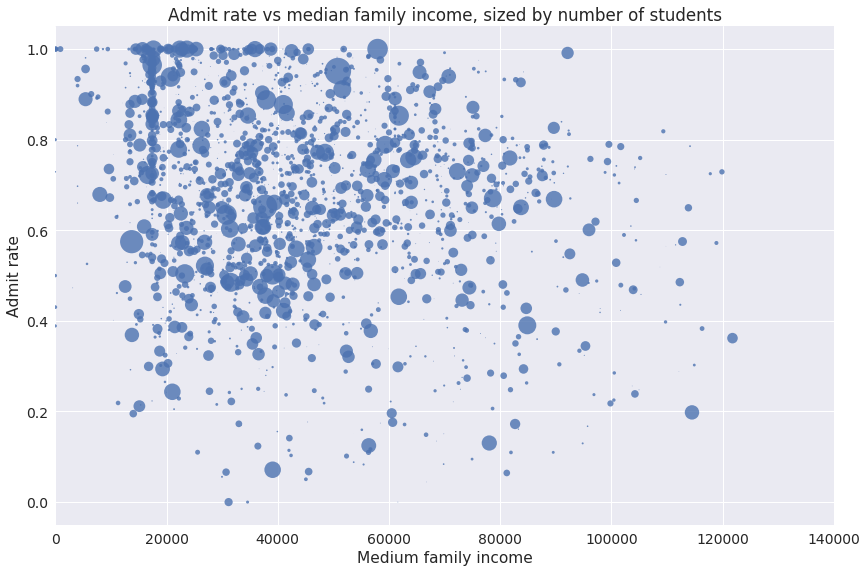

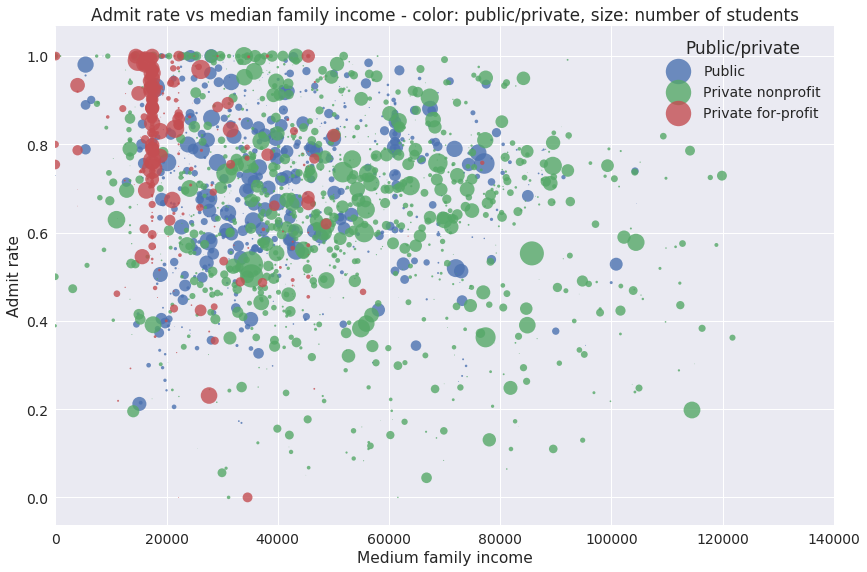

In [43]:
g = sns.lmplot('MD_FAMINC','ADM_RATE',data=processed_df,
              fit_reg=False,size=8,aspect=1.5,
              scatter_kws={"s":processed_df.UGDS/100})

plt.xlim(0,140000)
plt.title('Admit rate vs median family income, sized by number of students')
plt.ylabel('Admit rate')
plt.xlabel('Medium family income')

if SAVE:
    plt.savefig('images/bubp.png')
    plt.show()
else:
    plt.show()

g = sns.lmplot('MD_FAMINC','ADM_RATE',hue='CONTROL',data=processed_df,
              fit_reg=False,size=8,aspect=1.5,legend=False,
              scatter_kws={"s":processed_df.UGDS/100})

plt.xlim(0,140000)
plt.title('Admit rate vs median family income - color: public/private, size: number of students')
plt.ylabel('Admit rate')
plt.xlabel('Medium family income')
plt.legend(title='Public/private')

if SAVE:
    plt.savefig('images/cbubp.png')
    plt.show()
else:
    plt.show()

## Histograms

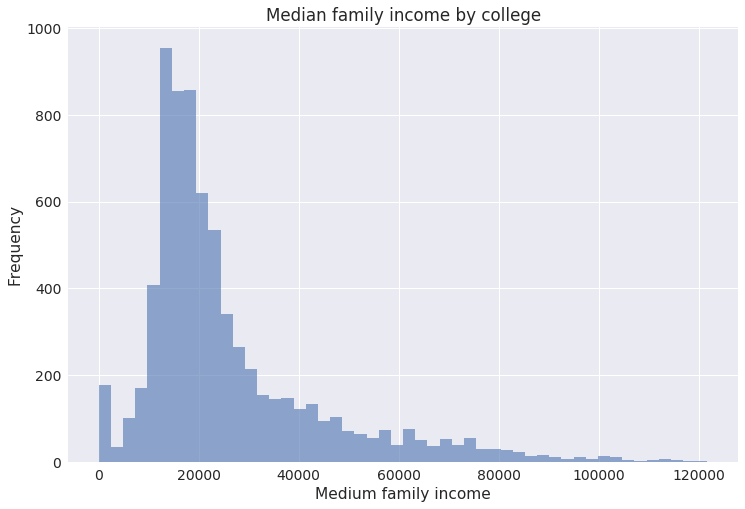

/home/tylergiallanza/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


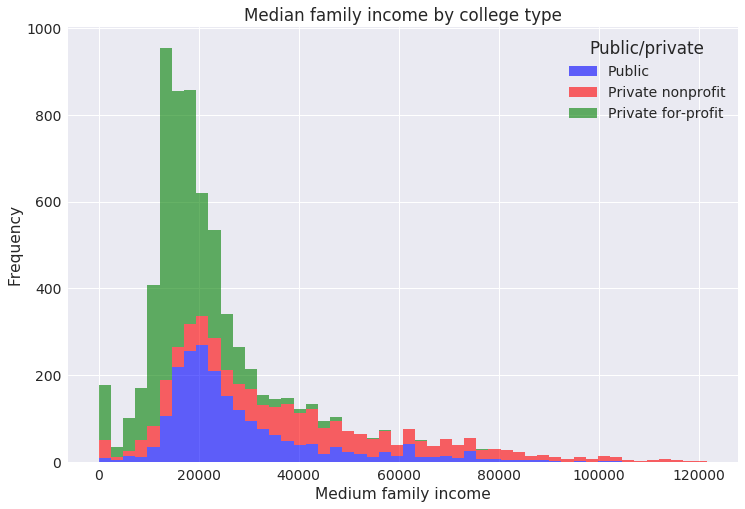

In [44]:
not_nan = np.logical_not(np.isnan(processed_df.MD_FAMINC))
#g = sns.distplot(processed_df.MD_FAMINC[not_nan],
#                kde=False)

g = plt.hist(processed_df.MD_FAMINC[not_nan],alpha=0.6,bins=50)

plt.title('Median family income by college')
plt.ylabel('Frequency')
plt.xlabel('Medium family income')

if SAVE:
    plt.savefig('images/histp.png')
    plt.show()
else:
    plt.show()

pivot_df=pd.pivot_table(processed_df,index='REGION',columns='CONTROL',
                        values='MD_FAMINC')

not_nan = processed_df[np.logical_not(np.isnan(processed_df.MD_FAMINC))]
public = not_nan[not_nan.CONTROL == 'Public']
nopi = not_nan[not_nan.CONTROL == 'Private nonprofit']
forpi = not_nan[not_nan.CONTROL == 'Private for-profit']

g = plt.hist([public.MD_FAMINC,nopi.MD_FAMINC,forpi.MD_FAMINC]
             ,alpha=0.6,bins=50,color=['blue','red','green'],stacked=True)

plt.title('Median family income by college type')
plt.ylabel('Frequency')
plt.xlabel('Medium family income')
plt.legend({'Public':'blue','Private nonprofit':'red',
            'Private for-profit':'green'},title='Public/private')

if SAVE:
    plt.savefig('images/shistp.png')
    plt.show()
else:
    plt.show()

## Line Plots

In [45]:
df_13 = pd.read_csv('MERGED2012_13_PP.csv')
df_13['YEAR'] = 2013
df_14 = pd.read_csv('MERGED2013_14_PP.csv')
df_14['YEAR'] = 2014
df_15 = pd.read_csv('MERGED2014_15_PP.csv')
df_15['YEAR'] = 2015
df_16 = pd.read_csv('MERGED2015_16_PP.csv')
df_16['YEAR'] = 2016

time_df=pd.concat((df_13,df_14,df_15,df_16))

/home/tylergiallanza/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1575,1606,1614,1615,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/tylergiallanza/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1537,1540,1542,1547,1548,1549,1561,1575,1606,1614,1615,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/tylergiallanza/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,1169,1170,1171,1172,1173,1174,1175,1177,1178,1179,1183,1184,1185,1186,1187,1188,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1250,1251,1252,1253,1255,1257,1261,1263,1264,1265,1266,1268,1270,1274,1275,1276

3882    2013
3826    2014
3779    2015
3680    2016
Name: YEAR, dtype: int64 3882    6175.0
3826    6295.0
3779    6340.0
3680    6348.0
Name: UGDS, dtype: float64


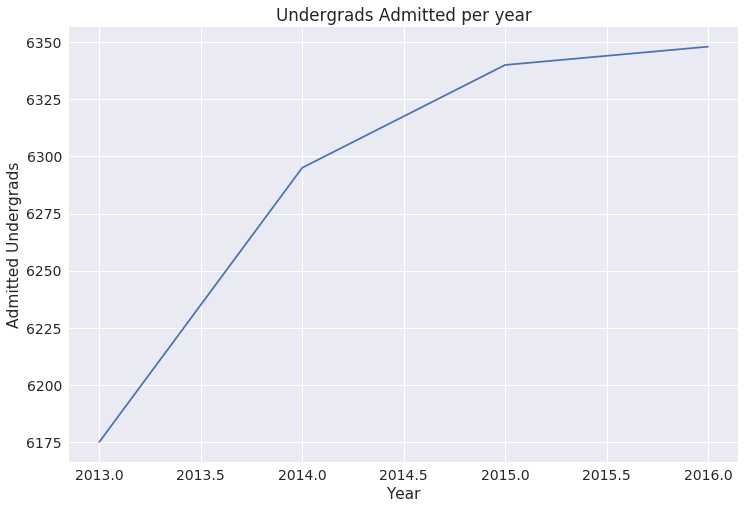

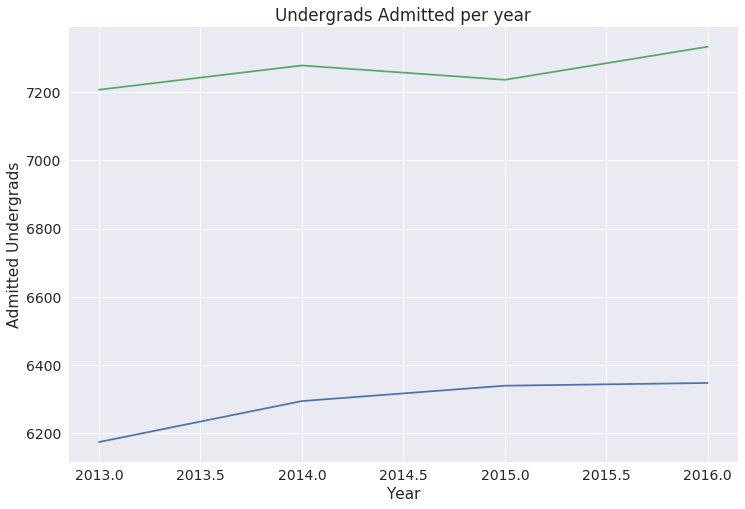

In [49]:


smu = time_df[time_df.INSTNM=='Southern Methodist University']
harv = time_df[time_df.INSTNM=='Harvard University']

print(smu['YEAR'],smu['UGDS'])


g = plt.plot(smu['YEAR'],smu['UGDS'])

plt.title('Undergrads Admitted per year')
plt.ylabel('Admitted Undergrads')
plt.xlabel('Year')

if SAVE:
    plt.savefig('images/slp.png')
    plt.show()
else:
    plt.show()

g = plt.plot(smu['YEAR'],smu['UGDS'])
g = plt.plot(harv['YEAR'],harv['UGDS'])

plt.title('Undergrads Admitted per year')
plt.ylabel('Admitted Undergrads')
plt.xlabel('Year')

if SAVE:
    plt.savefig('images/mlp.png')
    plt.show()
else:
    plt.show()
